In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

In [18]:
df_DA_IND['job_location'].value_counts().head(11)

job_location
India                             2056
Hyderabad, Telangana, India       1289
Anywhere                          1052
Bengaluru, Karnataka, India        355
Maharashtra, India                 203
Mumbai, Maharashtra, India         133
Pune, Maharashtra, India           119
Gurugram, Haryana, India           108
Chennai, Tamil Nadu, India         106
Secunderabad, Telangana, India      84
Indore, Madhya Pradesh, India       71
Name: count, dtype: int64

In [19]:
df_plot = df_DA_IND['job_location'].value_counts().head(11).to_frame()
df_plot

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


In [22]:
df_plot.drop('India',axis=0,inplace=True)

In [23]:
df_plot

,count
job_location,
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106
"Secunderabad, Telangana, India",84


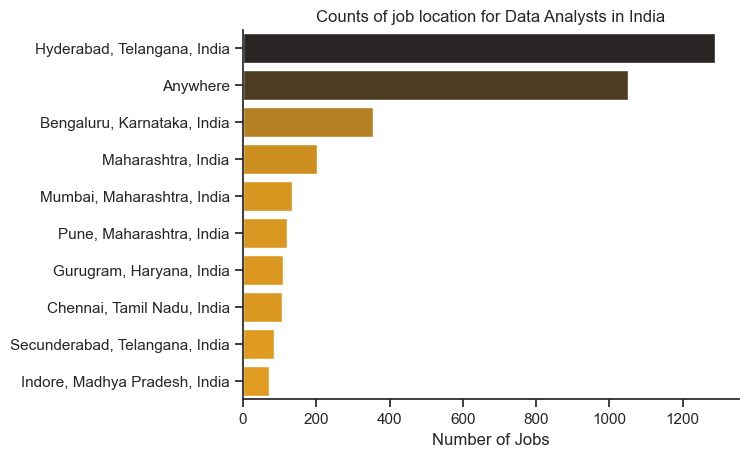

In [37]:
sns.set_theme(style='ticks')

sns.barplot(data=df_plot , x = 'count' , y = 'job_location',hue='count',palette='dark:orange_r',legend=False)
sns.despine() #Basically removes the border around the plot
plt.title('Counts of job location for Data Analysts in India')
plt.ylabel('')
plt.xlabel('Number of Jobs')
#plt.legend().remove()
plt.show()

In [65]:
df_DA_IND[['job_work_from_home','job_no_degree_mention']]

,job_work_from_home,job_no_degree_mention
38,False,False
123,True,False
159,False,False
171,True,False
194,False,False
...,...,...
785517,False,False
785548,False,False
785628,False,False
785691,False,False


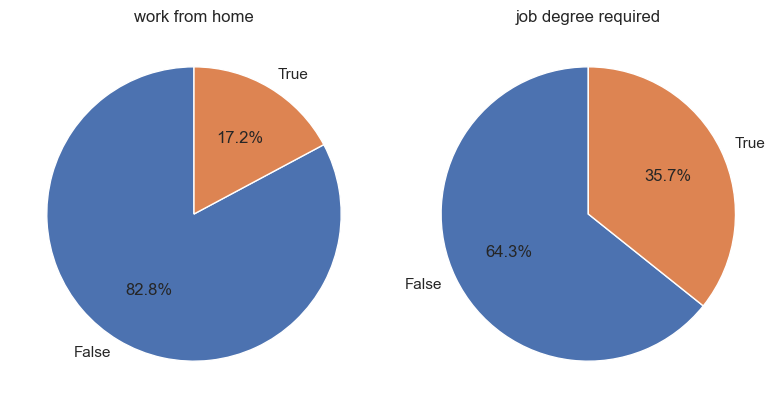

In [68]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches((8,5))

dict_column={
    'job_work_from_home':'work from home',
    'job_no_degree_mention':'job degree required'
}

for i , (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_IND[column].value_counts(),labels=['False','True'],startangle=90,autopct="%1.1f%%")
    # you have to mention labels carefully.Give the names in the highest to lowest order
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

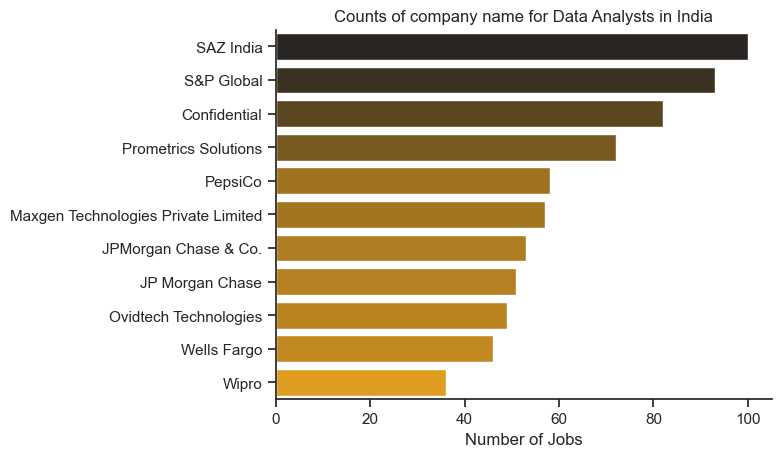

In [69]:

df_plot = df_DA_IND['company_name'].value_counts().head(11).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x = 'count' , y = 'company_name',hue='count',palette='dark:orange_r',legend=False)
sns.despine() #Basically removes the border around the plot
plt.title('Counts of company name for Data Analysts in India')
plt.ylabel('')
plt.xlabel('Number of Jobs')
#plt.legend().remove()
plt.show()